In [35]:
import pandas as pd

In [ ]:
df = pd.read_csv("../data/SPOTIFY_REVIEWS_tokens.csv")

In [37]:
df.head()

,Unnamed: 0,review_id,pseudo_author_id,author_name,review_text,review_rating,review_likes,author_app_version,review_timestamp,raw_word_count,length_type,length_type2,tokens
0,0,14a011a8-7544-47b4-8480-c502af0ac26f,152618553977019693742,A Google user,Use it every day,5,1,1.1.0.91,2014-05-27 14:21:48,4.0,Short,Short,"['use', 'it', 'every', 'day']"
1,1,bfa8876b-470e-4640-83a7-77427f7f37e8,234382942865437071667,A Google user,"I enjoy the awesome UI of this app, and it has...",5,4,1.1.0.91,2014-05-27 14:36:02,18.0,Long,Long,"['i', 'enjoy', 'the', 'awesome', 'ui', 'of', '..."
2,2,70e8252f-058a-47d9-b066-df9e1571c970,174473604608358796368,A Google user,Love it! Especially the new design!,5,2,1.1.0.91,2014-05-27 14:40:01,6.0,Short,Short,"['love', 'it', '!', 'especially', 'the', 'new'..."
3,3,672a155a-e81e-4d28-bdeb-a74c031bc072,286593453219054880269,A Google user,"Awesome UI, best music app out there!",5,1,1.1.0.91,2014-05-27 15:17:20,7.0,Medium,Long,"['awesome', 'ui', ',', 'best', 'music', 'app',..."
4,4,bbc1bf95-ed36-41a1-8b98-0f2e314caea5,167276875678680630145,A Google user,As a professional Android developer I'm glad t...,5,10,1.1.0.91,2014-05-27 15:26:48,26.0,Long,Long,"['as', 'a', 'professional', 'android', 'develo..."


In [19]:
## filter dates between 2019-11-15 and 2023-11-15
df['review_timestamp'] = pd.to_datetime(df['review_timestamp'])
df2 = df[(df['review_timestamp'] >= '2019-11-15') & (df['review_timestamp'] <= '2023-11-15')]

In [20]:
df2.head()

,Unnamed: 0,review_id,pseudo_author_id,author_name,review_text,review_rating,review_likes,author_app_version,review_timestamp,raw_word_count,length_type,length_type2,tokens
1637142,1663991,979989f1-78a2-4576-a783-c763ae7a9ffa,157768270865747512306,A Google user,I love the fact that I can listen to nearly an...,4,1,8.5.31.676,2019-11-15 00:02:50,68.0,Long,Long,"['i', 'love', 'the', 'fact', 'that', 'i', 'can..."
1637143,1663992,c0148acd-f97f-43d3-87b4-3d6f4ba99cbc,245561944421646747523,A Google user,Awesome app,5,0,8.5.31.676,2019-11-15 00:07:43,2.0,Very short,Short,"['awesome', 'app']"
1637144,1663993,904f2e7e-3fc2-499e-9444-198c6ce9294d,175419892642178477920,A Google user,Really good👌💯,5,0,8.5.31.676,2019-11-15 00:08:57,2.0,Very short,Short,"['really', '[UNK]']"
1637145,1663994,3c6f578f-54df-4251-8016-de5050f891a1,140067919511096968544,A Google user,Love it,5,0,8.5.31.676,2019-11-15 00:11:54,2.0,Very short,Short,"['love', 'it']"
1637146,1663995,bd9df46a-2ec2-434a-8f0b-298b80ad7eb3,680811646121687436181,A Google user,Liked Masti,4,0,8.5.28.985,2019-11-15 00:16:50,2.0,Very short,Short,"['liked', 'mast', '##i']"


In [21]:
## number of rows in df2
len(df2)

1669701

In [22]:
len(df)

3308617

In [8]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

In [23]:
## convert review_text to string and review_rating to int
df2["review_text"] = df2["review_text"].astype(str)
df2["review_rating"] = df2["review_rating"].astype(int)

/var/folders/1m/jk6pslfs62z1h484tpzvz7l00000gn/T/ipykernel_39327/3077904891.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2["review_text"] = df2["review_text"].astype(str)
/var/folders/1m/jk6pslfs62z1h484tpzvz7l00000gn/T/ipykernel_39327/3077904891.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2["review_rating"] = df2["review_rating"].astype(int)


In [24]:
## Train logistic regression with TF-IDF features
X_text = df2["review_text"]
y = df2["review_rating"] 

vectorizer = TfidfVectorizer(
    stop_words="english",
    max_features=5000,   
    ngram_range=(1, 2)   
)
X = vectorizer.fit_transform(X_text)

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

## Train logistic regression (multiclass)
model = LogisticRegression(
    multi_class="multinomial",
    solver="lbfgs",
    max_iter=1000
)
model.fit(X_train, y_train)

## Evaluate model
y_pred = model.predict(X_test)

print("Classification Report (1–5 Stars):")
print(classification_report(y_test, y_pred))

/opt/anaconda3/envs/compss211/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1272: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.8. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


Classification Report (1–5 Stars):
              precision    recall  f1-score   support

           1       0.68      0.82      0.74     78791
           2       0.29      0.05      0.08     15962
           3       0.33      0.08      0.13     18775
           4       0.42      0.13      0.20     32482
           5       0.81      0.95      0.87    187931

    accuracy                           0.75    333941
   macro avg       0.51      0.41      0.41    333941
weighted avg       0.69      0.75      0.70    333941



In [25]:
## Train logistic regression with TF-IDF features on long text
df_long = df2[df2["length_type2"] == "Long"].copy()
X_text = df_long["review_text"]
y = df_long["review_rating"]   

vectorizer = TfidfVectorizer(
    stop_words="english",
    max_features=5000,
    ngram_range=(1, 2)
)
X = vectorizer.fit_transform(X_text)

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

model = LogisticRegression(
    multi_class="multinomial",
    solver="lbfgs",
    max_iter=1000
)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
print("Classification Report (1–5 Stars) — LONG Text Only:")
print(classification_report(y_test, y_pred))

/opt/anaconda3/envs/compss211/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1272: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.8. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


Classification Report (1–5 Stars) — LONG Text Only:
              precision    recall  f1-score   support

           1       0.65      0.88      0.75     49630
           2       0.32      0.05      0.09     13167
           3       0.31      0.11      0.17     13802
           4       0.42      0.22      0.29     18451
           5       0.76      0.89      0.82     62070

    accuracy                           0.67    157120
   macro avg       0.49      0.43      0.42    157120
weighted avg       0.61      0.67      0.62    157120



In [26]:
## Train logistic regression with TF-IDF features on short text
df_short = df2[df2["length_type2"] == "Short"].copy()
X_text = df_short["review_text"]
y = df_short["review_rating"]   

vectorizer_short = TfidfVectorizer(
    stop_words="english",
    max_features=5000,
    ngram_range=(1, 2)
)
X = vectorizer_short.fit_transform(X_text)

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

model_short = LogisticRegression(
    multi_class="multinomial",
    solver="lbfgs",
    max_iter=1000
)
model_short.fit(X_train, y_train)

y_pred = model_short.predict(X_test)
print("Classification Report (1–5 Stars) — SHORT Text Only:")
print(classification_report(y_test, y_pred))

/opt/anaconda3/envs/compss211/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1272: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.8. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


Classification Report (1–5 Stars) — SHORT Text Only:
              precision    recall  f1-score   support

           1       0.78      0.75      0.77     29159
           2       0.00      0.00      0.00      2795
           3       0.32      0.01      0.02      4972
           4       0.40      0.02      0.04     14028
           5       0.84      0.98      0.90    125849

    accuracy                           0.83    176803
   macro avg       0.47      0.35      0.35    176803
weighted avg       0.77      0.83      0.77    176803



In [ ]:
## Train logistic regression with Word2Vec features
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
import gensim.downloader as api

df2["review_text"] = df2["review_text"].astype(str)
df2["review_rating"] = df2["review_rating"].astype(int)

X_text = df2["review_text"]
y = df2["review_rating"]

print("Loading Word2Vec (GoogleNews, 300-dim)...")
w2v = api.load("word2vec-google-news-300")
print("✅ Word2Vec loaded.")

def text_to_w2v_vector(text):
    words = [w.lower() for w in text.split() if w.lower() in w2v]
    if not words:
        return np.zeros(w2v.vector_size)
    return np.mean([w2v[w] for w in words], axis=0)

print("Converting text to Word2Vec vectors...")
X_vectors = np.vstack(df2["review_text"].apply(text_to_w2v_vector))
print("Shape:", X_vectors.shape)

X_train, X_test, y_train, y_test = train_test_split(
    X_vectors, y, test_size=0.2, random_state=42, stratify=y
)

model = LogisticRegression(
    multi_class="multinomial",
    solver="lbfgs",
    max_iter=1000
)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print("Classification Report:")
print(classification_report(y_test, y_pred))

Loading Word2Vec (GoogleNews, 300-dim)...
[==================================================] 100.0% 1662.8/1662.8MB downloaded
✅ Word2Vec loaded.
Converting text to Word2Vec vectors...
Shape: (1669701, 300)


/opt/anaconda3/envs/compss211/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1272: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.8. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


Classification Report:
              precision    recall  f1-score   support

           1       0.61      0.78      0.69     78791
           2       0.16      0.00      0.01     15962
           3       0.17      0.01      0.01     18775
           4       0.36      0.04      0.08     32482
           5       0.77      0.93      0.84    187931

    accuracy                           0.71    333941
   macro avg       0.41      0.35      0.32    333941
weighted avg       0.63      0.71      0.64    333941



In [39]:
## Train logistic regression with Word2Vec embeddings on long text
df_long = df2[df2["length_type2"] == "Long"].copy()

df_long["review_text"] = df_long["review_text"].astype(str)
df_long["review_rating"] = df_long["review_rating"].astype(int)

X_text = df_long["review_text"]
y = df_long["review_rating"]

print("Loading Word2Vec model (GoogleNews, 300-dim)...")
w2v = api.load("word2vec-google-news-300")
print("✅ Word2Vec model loaded.")

def text_to_w2v_vector(text):
    words = [w.lower() for w in text.split() if w.lower() in w2v]
    if not words:
        return np.zeros(w2v.vector_size)
    return np.mean([w2v[w] for w in words], axis=0)

print("Converting LONG reviews to Word2Vec vectors...")
X_vectors = np.vstack(X_text.apply(text_to_w2v_vector))
print("✅ Text conversion complete. Shape:", X_vectors.shape)

X_train, X_test, y_train, y_test = train_test_split(
    X_vectors, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

model = LogisticRegression(
    multi_class="multinomial",
    solver="lbfgs",
    max_iter=1000
)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
print("Classification Report (1–5 Stars) — LONG Reviews Only (Word2Vec):")
print(classification_report(y_test, y_pred))

Loading Word2Vec model (GoogleNews, 300-dim)...
✅ Word2Vec model loaded.
Converting LONG reviews to Word2Vec vectors...
✅ Text conversion complete. Shape: (785600, 300)


/opt/anaconda3/envs/compss211/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1272: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.8. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


Classification Report (1–5 Stars) — LONG Reviews Only (Word2Vec):
              precision    recall  f1-score   support

           1       0.59      0.87      0.70     49630
           2       0.22      0.01      0.01     13167
           3       0.25      0.03      0.06     13802
           4       0.39      0.16      0.23     18451
           5       0.72      0.86      0.78     62070

    accuracy                           0.63    157120
   macro avg       0.43      0.39      0.36    157120
weighted avg       0.56      0.63      0.56    157120



In [40]:
## Train logistic regression with Word2Vec embeddings on short text
df_short = df2[df2["length_type2"] == "Short"].copy()

df_short["review_text"] = df_short["review_text"].astype(str)
df_short["review_rating"] = df_short["review_rating"].astype(int)

X_text = df_short["review_text"]
y = df_short["review_rating"]

print("Loading Word2Vec model (GoogleNews, 300-dim)...")
w2v = api.load("word2vec-google-news-300")
print("✅ Word2Vec model loaded.")

def text_to_w2v_vector(text):
    words = [w.lower() for w in text.split() if w.lower() in w2v]
    if not words:
        return np.zeros(w2v.vector_size)
    return np.mean([w2v[w] for w in words], axis=0)

print("Converting SHORT reviews to Word2Vec vectors...")
X_vectors = np.vstack(X_text.apply(text_to_w2v_vector))
print("✅ Text conversion complete. Shape:", X_vectors.shape)

X_train, X_test, y_train, y_test = train_test_split(
    X_vectors, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

model_short = LogisticRegression(
    multi_class="multinomial",
    solver="lbfgs",
    max_iter=1000
)
model_short.fit(X_train, y_train)

y_pred = model_short.predict(X_test)
print("Classification Report (1–5 Stars) — SHORT Reviews Only (Word2Vec):")
print(classification_report(y_test, y_pred))

Loading Word2Vec model (GoogleNews, 300-dim)...
✅ Word2Vec model loaded.
Converting SHORT reviews to Word2Vec vectors...
✅ Text conversion complete. Shape: (884013, 300)


/opt/anaconda3/envs/compss211/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1272: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.8. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


Classification Report (1–5 Stars) — SHORT Reviews Only (Word2Vec):
              precision    recall  f1-score   support

           1       0.74      0.66      0.69     29159
           2       0.15      0.00      0.00      2795
           3       0.20      0.00      0.01      4972
           4       0.32      0.00      0.01     14028
           5       0.82      0.98      0.89    125849

    accuracy                           0.80    176803
   macro avg       0.44      0.33      0.32    176803
weighted avg       0.74      0.80      0.75    176803



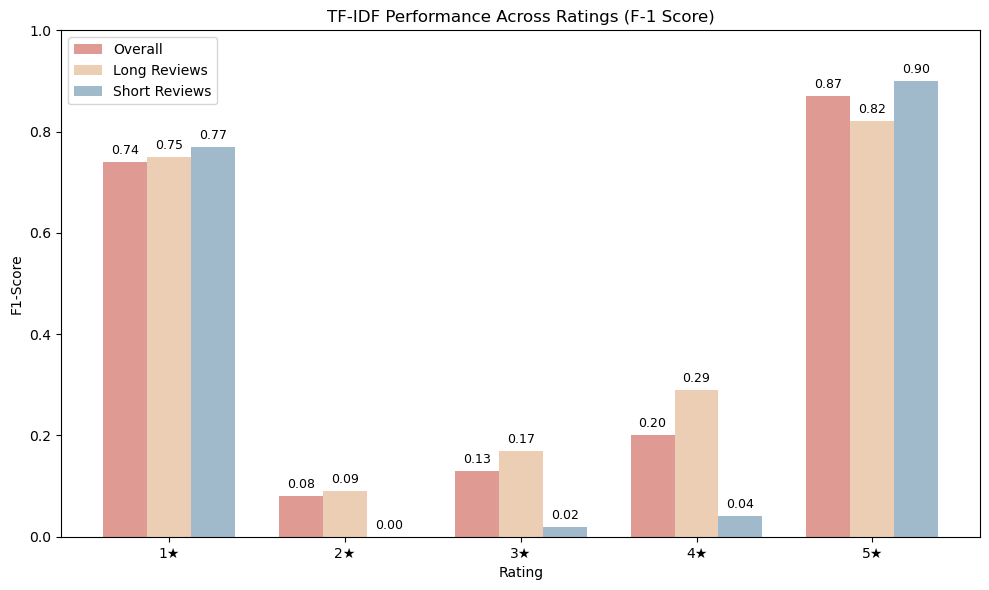

In [41]:
import matplotlib.pyplot as plt
import numpy as np
ratings = ['1★','2★','3★','4★','5★']
tfidf_overall = [0.74,0.08,0.13,0.20,0.87]
tfidf_long = [0.75,0.09,0.17,0.29,0.82]
tfidf_short = [0.77,0.00,0.02,0.04,0.90]
x = np.arange(len(ratings))
width = 0.25
plt.figure(figsize=(10,6))
bars1 = plt.bar(x - width, tfidf_overall, width, label='Overall', color="#D98880", alpha=0.85)
bars2 = plt.bar(x, tfidf_long, width, label='Long Reviews', color="#E8C6A7", alpha=0.85)
bars3 = plt.bar(x + width, tfidf_short, width, label='Short Reviews', color="#8FAEC4", alpha=0.85)

for bar in bars1 + bars2 + bars3:
    h = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, h + 0.01, f"{h:.2f}",
             ha='center', va='bottom', fontsize=9)
plt.xticks(x, ratings)
plt.ylim(0, 1)
plt.ylabel("F1-Score")
plt.xlabel("Rating")
plt.title("TF-IDF Performance Across Ratings (F-1 Score)")
plt.legend()
plt.tight_layout()
plt.show()